# Complete Case Analysis

Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists of discarding observations with missing data in any variable.

We can:

- dropna with pandas
- [dropna](https://feature-engine.trainindata.com/en/latest/user_guide/imputation/DropMissingData.html) with Feature-engine.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Load data

In [2]:
data = pd.read_csv("credit_approval_uci.csv")

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,NaN,NaN,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("target", axis=1),
    data["target"],
    test_size=0.30,
    random_state=42,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 15), (207, 15), (483,), (207,))

## Check proportion of missing data

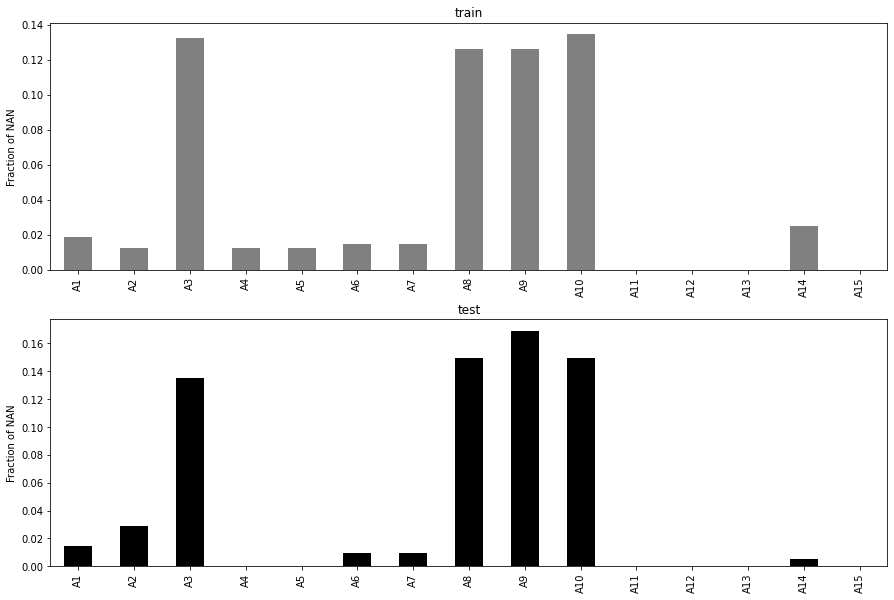

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), squeeze=False)

X_train.isnull().mean().plot(
    kind='bar', color='grey', ax=axes[0, 0], title="train")
X_test.isnull().mean().plot(
    kind='bar', color='black', ax=axes[1, 0], title="test")

axes[0, 0].set_ylabel('Fraction of NAN')
axes[1, 0].set_ylabel('Fraction of NAN')

plt.show()

## Drop observations with missing data

[pd.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [5]:
# Remove observations with missing data
# in any variable:

train_cca = X_train.dropna()
test_cca = X_test.dropna()

In [6]:
print(f"Total observations: {len(X_train)}")
print(f"Observations without NAN: {len(train_cca)}")

Total observations: 483
Observations without NAN: 264


In [7]:
# adjust the target variable

y_train_cca = y_train.loc[train_cca.index]
y_test_cca = y_test.loc[test_cca.index]

y_train.shape, y_train_cca.shape

((483,), (264,))

## Drop observations with missing data in specific variables

In [8]:
train_cca = X_train.dropna(subset=["A1", "A2", "A6", "A7", "A14"])
test_cca = X_test.dropna(subset=["A1", "A2", "A6", "A7", "A14"])

In [9]:
print(f"Total observations: {len(X_train)}")
print(f"Observations without NAN: {len(train_cca)}")

Total observations: 483
Observations without NAN: 457


## Feature-engine

[DropMissingData](https://feature-engine.readthedocs.io/en/latest/api_doc/imputation/DropMissingData.html)

In [10]:
from feature_engine.imputation import DropMissingData

### Automatically find variables with missing data

In [11]:
# Set the imputer to find variables with missing data:

cca = DropMissingData(variables=None, missing_only=True)

# Find all variables with missing data:

cca.fit(X_train)

DropMissingData()

In [12]:
# The variables that will be considered
# for the imputation (those with NA in
# the train set):

cca.variables_

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A14']

In [13]:
# Drop observations with missing data:

train_cca = cca.transform(X_train)
test_cca = cca.transform(X_test)

In [14]:
print(f"Total observations: {len(X_train)}")
print(f"Observations without NAN: {len(train_cca)}")

Total observations: 483
Observations without NAN: 264


In [15]:
# Drop observations with missing data
# in train and target:

train_cca, y_train_cca = cca.transform_x_y(X_train, y_train)
test_cca, y_test_cca = cca.transform_x_y(X_test, y_test)

y_train.shape, y_train_cca.shape

((483,), (264,))

### Remove observations with missing data in specific variables

In [16]:
# Set the imputer to remove observations with
# missing data in a subset of variables:

cca = DropMissingData(variables=["A1", "A2", "A6", "A7", "A14"])

# Imputer does not learn any parameter,
# but we must fit it anyhow:

cca.fit(X_train)

DropMissingData(variables=['A1', 'A2', 'A6', 'A7', 'A14'])

In [17]:
# Drop observations with missing data
# in train and target:

train_cca, y_train_cca = cca.transform_x_y(X_train, y_train)
test_cca, y_test_cca = cca.transform_x_y(X_test, y_test)

X_train.shape, train_cca.shape, y_train.shape, y_train_cca.shape

((483, 15), (457, 15), (483,), (457,))